Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
last updated: 2016-06-26 

CPython 3.5.1
IPython 4.2.0

matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.1


In [2]:
%matplotlib inline

# Perceptron

Implementation of a Perceptron learning algorithm for classification.

> from mlxtend.classifier import Perceptron

# Overview

The idea behind this "thresholded" perceptron was to mimic how a single neuron in the brain works: It either "fires" or not. 
A perceptron receives multiple input signals, and if the sum of the input signals exceed a certain threshold it either returns a signal or remains "silent" otherwise. What made this a "machine learning" algorithm was Frank Rosenblatt's idea of the perceptron learning rule: The perceptron algorithm is about learning the weights for the input signals in order to draw linear decision boundary that allows us to discriminate between the two linearly separable classes +1 and -1.



![](./Perceptron_files/perceptron_schematic.png)

### Basic Notation

Before we dive deeper into the algorithm(s) for learning the weights of the perceptron classifier, let us take a brief look at the basic notation. In the following sections, we will label the *positive* and *negative* class in our binary classification setting as "1" and "-1", respectively. Next, we define an activation function $g(\mathbf{z})$ that takes a linear combination of the input values $\mathbf{x}$ and weights $\mathbf{w}$ as input ($\mathbf{z} = w_1x_{1} + \dots + w_mx_{m}$), and if $g(\mathbf{z})$ is greater than a defined threshold $\theta$ we predict 1 and -1 otherwise; in this case, this activation function $g$ is a simple "unit step function," which is sometimes also called "Heaviside step function." 

$$
 g(z) =\begin{cases}
    1 & \text{if $z \ge \theta$}\\
    -1 & \text{otherwise}.
  \end{cases}
$$

where

$$z =  w_1x_{1} + \dots + w_mx_{m} = \sum_{j=1}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}$$

$\mathbf{w}$ is the feature vector, and $\mathbf{x}$ is an $m$-dimensional sample from the training dataset:

$$ 
\mathbf{w} = \begin{bmatrix}
    w_{1}  \\
    \vdots \\
    w_{m}
\end{bmatrix}
\quad  \mathbf{x} = \begin{bmatrix}
    x_{1}  \\
    \vdots \\
    x_{m}
\end{bmatrix}$$

In order to simplify the notation, we bring $\theta$ to the left side of the equation and define $w_0 = -\theta  \text{ and } x_0=1$ 

so that 

$$\begin{equation}
 g({z}) =\begin{cases}
    1 & \text{if $z \ge 0$}\\
    -1 & \text{otherwise}.
  \end{cases}
\end{equation}$$

and


$$z = w_0x_{0} + w_1x_{1} + \dots + w_mx_{m} = \sum_{j=0}^{m} x_{j}w_{j} \\ = \mathbf{w}^T\mathbf{x}.$$





### Perceptron Rule

Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps: 

1. Initialize the weights to 0 or small random numbers.
2. For each training sample $\mathbf{x^{(i)}}$:
    2. Calculate the *output* value.
    2. Update the weights.

The output value is the class label predicted by the unit step function that we defined earlier (output $=g(\mathbf{z})$) and the weight update can be written more formally as  $w_j := w_j + \Delta w_j$.

The value for updating the weights at each increment is calculated by the learning rule

$\Delta w_j = \eta \; (\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{j}$

where $\eta$ is the learning rate (a constant between 0.0 and 1.0), "target" is the true class label, and the "output" is the predicted class label.

aIt is important to note that all weights in the weight vector are being updated simultaneously. Concretely, for a 2-dimensional dataset, we would write the update as:

$\Delta w_0 = \eta(\text{target}^{(i)} - \text{output}^{(i)})$  
$\Delta w_1 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{1}$  
$\Delta w_2 = \eta(\text{target}^{(i)} - \text{output}^{(i)})\;x^{(i)}_{2}$  

Before we implement the perceptron rule in Python, let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged:

- $\Delta w_j = \eta(-1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = 0$ 
- $\Delta w_j = \eta(1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = 0$ 

However, in case of a wrong prediction, the weights are being "pushed" towards the direction of the positive or negative target class, respectively:

- $\Delta w_j = \eta(1^{(i)} - -1^{(i)})\;x^{(i)}_{j} = \eta(2)\;x^{(i)}_{j}$ 
- $\Delta w_j = \eta(-1^{(i)} - 1^{(i)})\;x^{(i)}_{j} = \eta(-2)\;x^{(i)}_{j}$ 




It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset ("epochs") and/or a threshold for the number of tolerated misclassifications.

### References


- F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957.

# Examples

## Example 1 - Classification of Iris Flowers

Iteration: 5/5 | Elapsed: 00:00:00 | ETA: 00:00:00

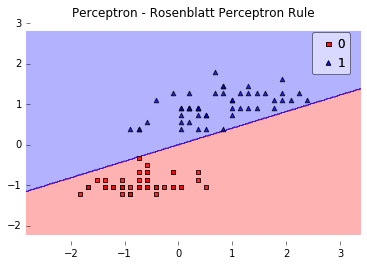

Bias & Weights: [[-0.04500809]
 [ 0.11048855]]


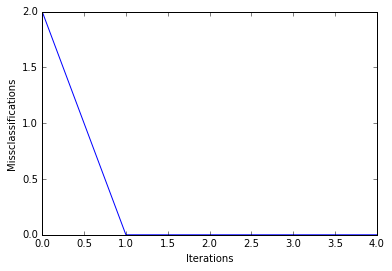

In [3]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Perceptron
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


# Rosenblatt Perceptron

ppn = Perceptron(epochs=5, 
                 eta=0.05, 
                 random_seed=0,
                 print_progress=3)
ppn.fit(X, y)

plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron - Rosenblatt Perceptron Rule')
plt.show()

print('Bias & Weights: %s' % ppn.w_)

plt.plot(range(len(ppn.cost_)), ppn.cost_)
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()

# API

In [4]:
with open('../../api_modules/mlxtend.classifier/Perceptron.md', 'r') as f:
    print(f.read())

## Perceptron

*Perceptron(eta=0.1, epochs=50, random_seed=None, print_progress=0)*

Perceptron classifier.

    Note that this implementation of the Perceptron expects binary class labels
    in {0, 1}.

**Parameters**

- `eta` : float (default: 0.1)

    Learning rate (between 0.0 and 1.0)

- `epochs` : int (default: 50)

    Number of passes over the training dataset.
    Prior to each epoch, the dataset is shuffled to prevent cycles.

- `random_seed` : int

    Random state for initializing random weights and shuffling.

- `print_progress` : int (default: 0)

    Prints progress in fitting to stderr.
    0: No output
    1: Epochs elapsed and cost
    2: 1 plus time elapsed
    3: 2 plus estimated time until completion

**Attributes**

- `w_` : 2d-array, shape={n_features, 1}

    Model weights after fitting.

- `b_` : 1d-array, shape={1,}

    Bias unit after fitting.

- `cost_` : list

    Number of misclassifications in every epoch.

### Methods

<hr>

*fit(X, y, init_params=Tru